In [2]:
import pandas as pd
from pandasai import PandasAI
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading data into dataframe
df = pd.read_csv('/home/muregz/data_analysis/Value of Transactions./Mobile Payments.csv')
df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2023,May,334726,77.34,205.88,670.44
1,2023,April,329968,75.96,194.95,615.25
2,2023,March,321149,73.72,204.83,645.80
3,2023,February,323613,74.04,184.82,578.09
4,2023,January,319079,74.41,198.31,589.30
5,2022,December,317983,73.12,207.01,708.06
6,2022,November,315240,73.22,190.46,639.84
7,2022,October,311957,73.22,196.93,646.50
8,2022,September,308799,71.67,189.70,674.47
9,2022,August,310450,70.06,184.81,677.36


In [4]:
print(df.dtypes)

Year                                                   int64
Month                                                 object
Active Agents                                          int64
Total Registered Mobile Money Accounts (Millions)    float64
Total Agent Cash in Cash Out (Volume Million)        float64
Total Agent Cash in Cash Out (Value KSh billions)    float64
dtype: object


In [5]:
df.columns

Index(['Year', 'Month', 'Active Agents',
       'Total Registered Mobile Money Accounts (Millions)',
       'Total Agent Cash in Cash Out (Volume Million)',
       'Total Agent Cash in Cash Out (Value KSh billions)'],
      dtype='object')

In [6]:
df.corr()

/tmp/ipykernel_340087/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
Year,1.000000,0.988853,0.976764,0.989828,0.961654
Active Agents,0.988853,1.000000,0.986026,0.988762,0.980848
Total Registered Mobile Money Accounts (Millions),0.976764,0.986026,1.000000,0.969687,0.975073
Total Agent Cash in Cash Out (Volume Million),0.989828,0.988762,0.969687,1.000000,0.968611
Total Agent Cash in Cash Out (Value KSh billions),0.961654,0.980848,0.975073,0.968611,1.000000


In [8]:
#checking for null values
df.isnull().sum()

Year                                                 0
Month                                                0
Active Agents                                        0
Total Registered Mobile Money Accounts (Millions)    0
Total Agent Cash in Cash Out (Volume Million)        0
Total Agent Cash in Cash Out (Value KSh billions)    0
dtype: int64

In [9]:
#checking dataset information and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               195 non-null    int64  
 1   Month                                              195 non-null    object 
 2   Active Agents                                      195 non-null    int64  
 3   Total Registered Mobile Money Accounts (Millions)  195 non-null    float64
 4   Total Agent Cash in Cash Out (Volume Million)      195 non-null    float64
 5   Total Agent Cash in Cash Out (Value KSh billions)  195 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.3+ KB


In [10]:
#checking for any unique values
df.nunique()

Year                                                  17
Month                                                 12
Active Agents                                        195
Total Registered Mobile Money Accounts (Millions)    194
Total Agent Cash in Cash Out (Volume Million)        195
Total Agent Cash in Cash Out (Value KSh billions)    195
dtype: int64

In [13]:
#performing descriptive analysis on the dataset for years from 2007-2013
df[df["Year"]<= 2013].describe()

,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2010.073171,38151.890244,12.446239,28.240576,73.219973
std,1.980027,34124.798039,8.172197,20.940986,55.382700
min,2007.000000,307.000000,0.020992,0.021714,0.064391
25%,2008.000000,5575.250000,4.834160,8.972758,23.022500
50%,2010.000000,33419.000000,14.029700,26.869150,61.651900
75%,2012.000000,56469.250000,19.440000,45.405250,122.535000
max,2013.000000,113130.000000,25.326300,69.137800,182.495000


In [16]:
#descriptive analysis for years from 2013-2019
df[(df["Year"] >= 2019) & (df["Year"] <= 2019)].describe()

,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
count,12.0,12.000000,12.000000,12.000000,12.000000
mean,2019.0,221424.500000,52.399600,153.256667,362.147000
std,0.0,7587.483587,5.125789,4.046983,13.507151
min,2019.0,201336.000000,40.295300,144.490000,328.150000
25%,2019.0,222180.000000,50.280000,151.677000,359.977250
50%,2019.0,222830.000000,53.041400,153.156500,366.147000
75%,2019.0,224858.500000,55.848550,155.191500,368.110250
max,2019.0,230220.000000,58.361300,161.380000,382.930000


In [17]:
#descriptive analysis for years from 2019-2023
df[df['Year'] >= 2019].describe()

,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2020.735849,274706.528302,64.219615,172.393113,517.656358
std,1.303117,38741.209257,8.043158,19.857791,126.898989
min,2019.000000,201336.000000,40.295300,124.994000,307.991000
25%,2020.000000,234747.000000,58.713100,154.243000,368.390000
50%,2021.000000,294111.000000,66.880000,174.106000,537.750000
75%,2022.000000,304822.000000,68.720000,188.240000,618.140000
max,2023.000000,334726.000000,77.340000,207.010000,722.520000


# 2007 - 2013

**checking the rate at which the number of active agents rose**

In [22]:
agents_2007 = df[df['Year'] == 2007]['Active Agents'].values[0]
agents_2013 = df[df['Year'] == 2013]['Active Agents'].values[0]

# Calculate the percentage change
percentage_change = ((agents_2013 - agents_2007) / agents_2007) * 100

print(f"Percentage Change in Agents from 2007 to 2013: {percentage_change:.2f}%")

Percentage Change in Agents from 2007 to 2013: 7051.07%


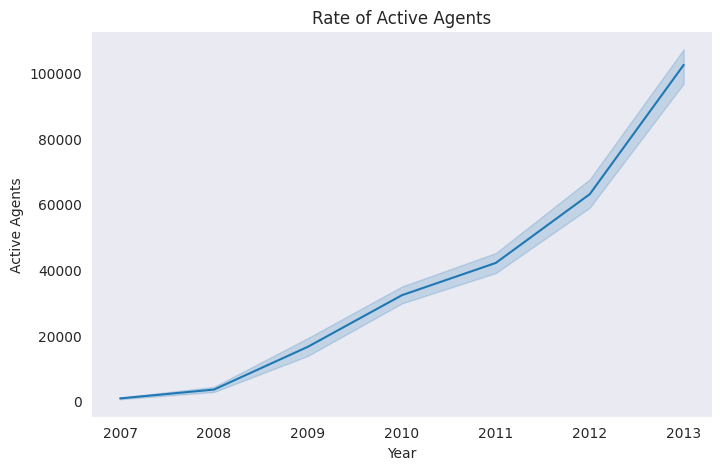

In [35]:
#filtering between 2007 to 2013
agents = df[(df['Year'] >= 2007) & (df['Year'] <= 2013)]

#creating a line plot
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Active Agents', data=agents)
sns.despine(left=True)
sns.set_style('dark')

#adding a title
plt.title('Rate of Active Agents')

plt.show()

**Checking Total Registered Mobile Money Users**

In [38]:
users_2007 = df[df['Year'] == 2007]['Total Registered Mobile Money Accounts (Millions)'].values[0]
users_2013 = df[df['Year'] == 2013]['Total Registered Mobile Money Accounts (Millions)'].values[0]

#calculating the percentage change
percent_change_mobile = ((users_2013 - users_2007) / users_2007) * 100

#printing the percentage change
print(f"The percentage change in the number of registered mobile money accounts is {percent_change_mobile:.2f}%")

The percentage change in the number of registered mobile money accounts is 1782.62%


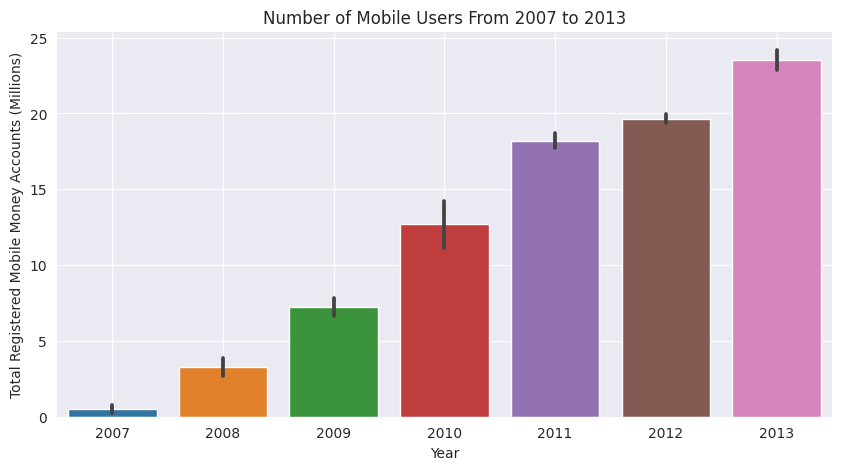

In [47]:
mobile_users_2013 = df[(df['Year'] >= 2007) & (df['Year'] <= 2013)]

#creating a line plot
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Total Registered Mobile Money Accounts (Millions)', data=mobile_users_2013)
sns.despine(left=True)
plt.title('Number of Mobile Users From 2007 to 2013')
plt.grid(True)

caption = 'Data from Central Bank of Kenya Website.'
plt.annotate(caption, (2008, 300000), fontsize=10)

plt.show()

**Volume of transactions generated during the period**